# Checks for spectum as function of $\lambda$

In [5]:
import numpy as np
import h5py as hdf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


def retrieve_spectrum_pandas(filename):
    """ Returns a pandas dataframe with all speparate spectra.
    """
    df = pd.DataFrame()
    with hdf.File(filename, 'r') as f:
        for ds in f:
            data = {
                'lambda' : float(ds.split('_')[-1]),
                'spectrum' : [f[ds][:]]
            }
            df = df.append(pd.DataFrame(data), ignore_index=True)
        df.sort_values(by='lambdas')
            
    return df


def retrieve_spectrum_numpy(filename, cutoff=20):
    """ Returns a 2D numpy array with all the information.
    """
    data = {}
    lambdas = []
    with hdf.File(filename, 'r') as f:
        for ds in f:
            lam = ds.split('_')[-1]
            data[lam] = f[ds][:]
            lambdas.append(float(lam))
    lambdas = sorted(lambdas)
    
    spectrum = np.zeros(shape=(len(lambdas),cutoff))
    for k, key in enumerate(lambdas):
        spectrum[k,:] = data['{:.6f}'.format(key)][:cutoff]
    return np.array(lambdas), spectrum


## 2D: 4x6 system

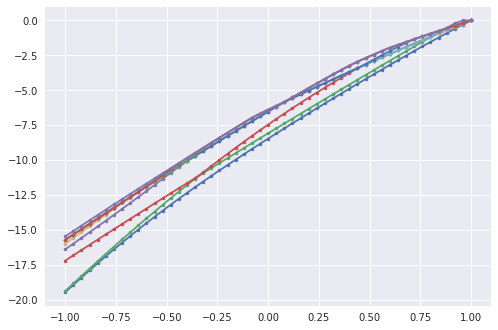

In [6]:
lambdas, data = retrieve_spectrum_numpy('../output/multi_spectrum_4x4.hdf5')

with plt.style.context('seaborn'):
    fig, ax = plt.subplots()
    
    n_states = 10
    gs = data[:,0]
    for i in range(n_states):
        ax.plot(lambdas, data[:,i], marker='.', ls='-')
         
#     ax.set_ylim(0, 2)

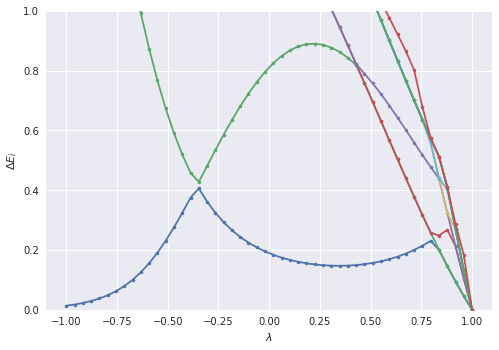

In [7]:
lambdas, data = retrieve_spectrum_numpy('../output/multi_spectrum_4x6.hdf5', cutoff=50)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots()
    
    n_states = 10
    gs = data[:,0]
    for i in range(1,n_states):
        ax.plot(lambdas, data[:,i]-gs, marker='.', ls='-')
    
    ax.set_xlabel('$\\lambda$')
    ax.set_ylabel('$\\Delta E_i$')
    ax.set_ylim(0, 1)
    
    fig.savefig('gap_spectrum_4x6.png')
    

## 3D: 2x2x2 spectrum

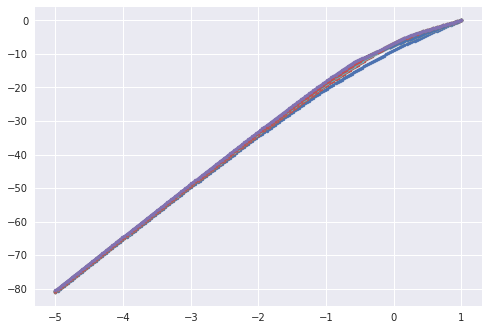

In [9]:
lambdas, data = retrieve_spectrum_numpy('../output/multi_spectrum_bosons_2x2x2.hdf5')

with plt.style.context('seaborn'):
    fig, ax = plt.subplots()
    
    n_states = 10
    gs = data[:,0]
    for i in range(n_states):
        ax.plot(lambdas, data[:,i], marker='.', ls='-')

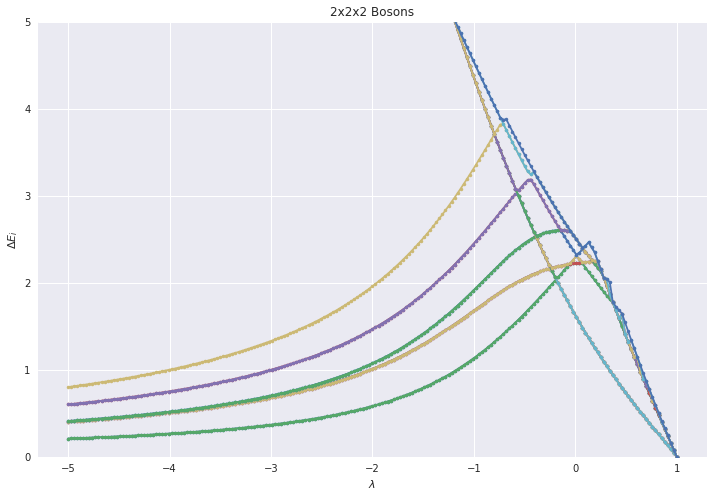

In [16]:
lambdas, data = retrieve_spectrum_numpy('../output/multi_spectrum_bosons_2x2x2.hdf5')

with plt.style.context('seaborn'):
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 8)
    
    n_states = 20
    gs = data[:,0]
    for i in range(1, n_states):
        ax.plot(lambdas, data[:,i]-gs, marker='.', ls='-')
        
    ax.set_xlabel('$\\lambda$')
    ax.set_ylabel('$\\Delta E_i$')
    ax.set_ylim(0, 5)
    ax.set_title('2x2x2 Bosons')
    
    fig.savefig('gap_spectrum_bosons_2x2x2.png')
    
for i, l in enumerate(lambdas):
    with open('data/bosons_2x2x2/lambda_{:.6f}.dat'.format(l), 'w') as f:
        f.write('E\n')
        for k in data[i,:]:
            f.write(f'{k}\n')

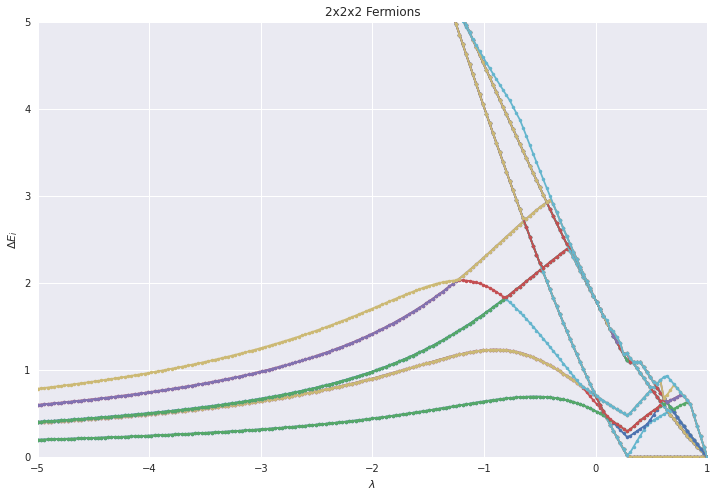

In [17]:
lambdas, data = retrieve_spectrum_numpy('../output/multi_spectrum_fermions_2x2x2.hdf5', cutoff=50)

with plt.style.context('seaborn'):
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 8)
    
    n_states = 25
    gs = data[:,0]
    for i in range(1, n_states):
        ax.plot(lambdas, data[:,i]-gs, marker='.', ls='-')
        
    ax.set_xlabel('$\\lambda$')
    ax.set_ylabel('$\\Delta E_i$')
    ax.set_xlim(-5, 1)
    ax.set_ylim(0, 5)
    ax.set_title('2x2x2 Fermions')
    
    fig.savefig('gap_spectrum_fermions_2x2x2.png')
    
    
for i, l in enumerate(lambdas):
    with open('data/fermions_2x2x2/lambda_{:.6f}.dat'.format(l), 'w') as f:
        f.write('E\n')
        for k in data[i,:]:
            f.write(f'{k}\n')